In [3]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from Solver import chebyshev_shifted, plot_graphics, print_table, solve_examples

In [4]:
def example_1_problem():
    """
    Example 1: y(t) = e^-t - (e-2)cos(t)/2 + 1/2 * integral
    Exact solution: y(t) = e^-t
    """
    def nonlinear_function(cos_t, s_j_tensor, y_s):
        return cos_t * (s_j_tensor**2) / (y_s**1.0)
    def exact_solution(t):
        return np.exp(-t)
    return nonlinear_function, exact_solution

def cheb1(t_array):
    is_scalar = np.isscalar(t_array)
    t = np.atleast_1d(t_array)
    results = np.zeros_like(t)
    for i, t_val in enumerate(t):
        T0 = chebyshev_shifted(t_val, 0)
        T1 = chebyshev_shifted(t_val, 1)
        T2 = chebyshev_shifted(t_val, 2)
        T3 = chebyshev_shifted(t_val, 3)
        T4 = chebyshev_shifted(t_val, 4)
        T5 = chebyshev_shifted(t_val, 5)
        denominator = (1.75338769 * T0 + 8.50391674e-1 * T1 + 1.05208696e-1 * T2 + 8.72214419e-3 * T3 + 5.44564743e-4 * T4 + 2.71540535e-5 * T5)
        results[i] = 1.0 / denominator
    return results[0] if is_scalar else results


--- Solving Example 1 ---


  0%|          | 0/1000 [00:00<?, ?it/s]

Loss = 1.0987464980e-08: 100%|██████████| 1000/1000 [02:47<00:00,  5.96it/s]


Starting L-BFGS optimization...
Training completed in 167.93 seconds
Final Loss: 1.0998039419e-08


Using features ['x0']
Compiling Julia backend...
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           76     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09980D-08    |proj g|=  1.21145D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   76      0      1      0     0     0   1.211D-08   1.100D-08
  F =   1.0998039418670364E-008

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


[ Info: Started!



Expressions evaluated per second: 2.220e+04
Progress: 301 / 800 total iterations (37.625%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.419e-01  3.604e+01  y = x0
2           3.346e-02  1.978e+00  y = 0.63264
4           2.134e-02  2.250e-01  y = 1.0397 - x0
5           1.242e-23  3.604e+01  y = exp(x0 * -1)
8           5.965e-24  2.444e-01  y = exp(5.1624e-12 - x0) + 8.3428e-12
9           2.541e-24  8.535e-01  y = 1.204e-11 + exp((x0 - x0) - x0)
24          1.154e-24  5.260e-02  y = (x0 + (exp((x0 - x0) - x0) + ((((x0 - x0) - x0) - (x0 ...
                                      + x0)) * 0.33333))) - -1.0244e-11
26          1.145e-24  3.894e-03  y = (x0 + ((exp((x0 - x0) - x0) + x0) + ((((x0 - x0) - x0)...
                                       - (x0 + x0)) * 0.66667))) - -1.

[ Info: Final population:
[ Info: Results saved to:



Symbolic Approximation:
y(t) = - x_{0} + x_{0} + e^{e^{1.6093036344361806 - e^{x_{0} + x_{0} x_{0}}}} \left(x_{0} - \left(x_{0} + x_{0} + x_{0} - 0.31628459594097597\right) - 0.08160928436634202\right) \left(-2.1114195179554666 \cdot 10^{-12}\right) + e^{- x_{0} + 0.0} - -9.633487479146903 \cdot 10^{-12}


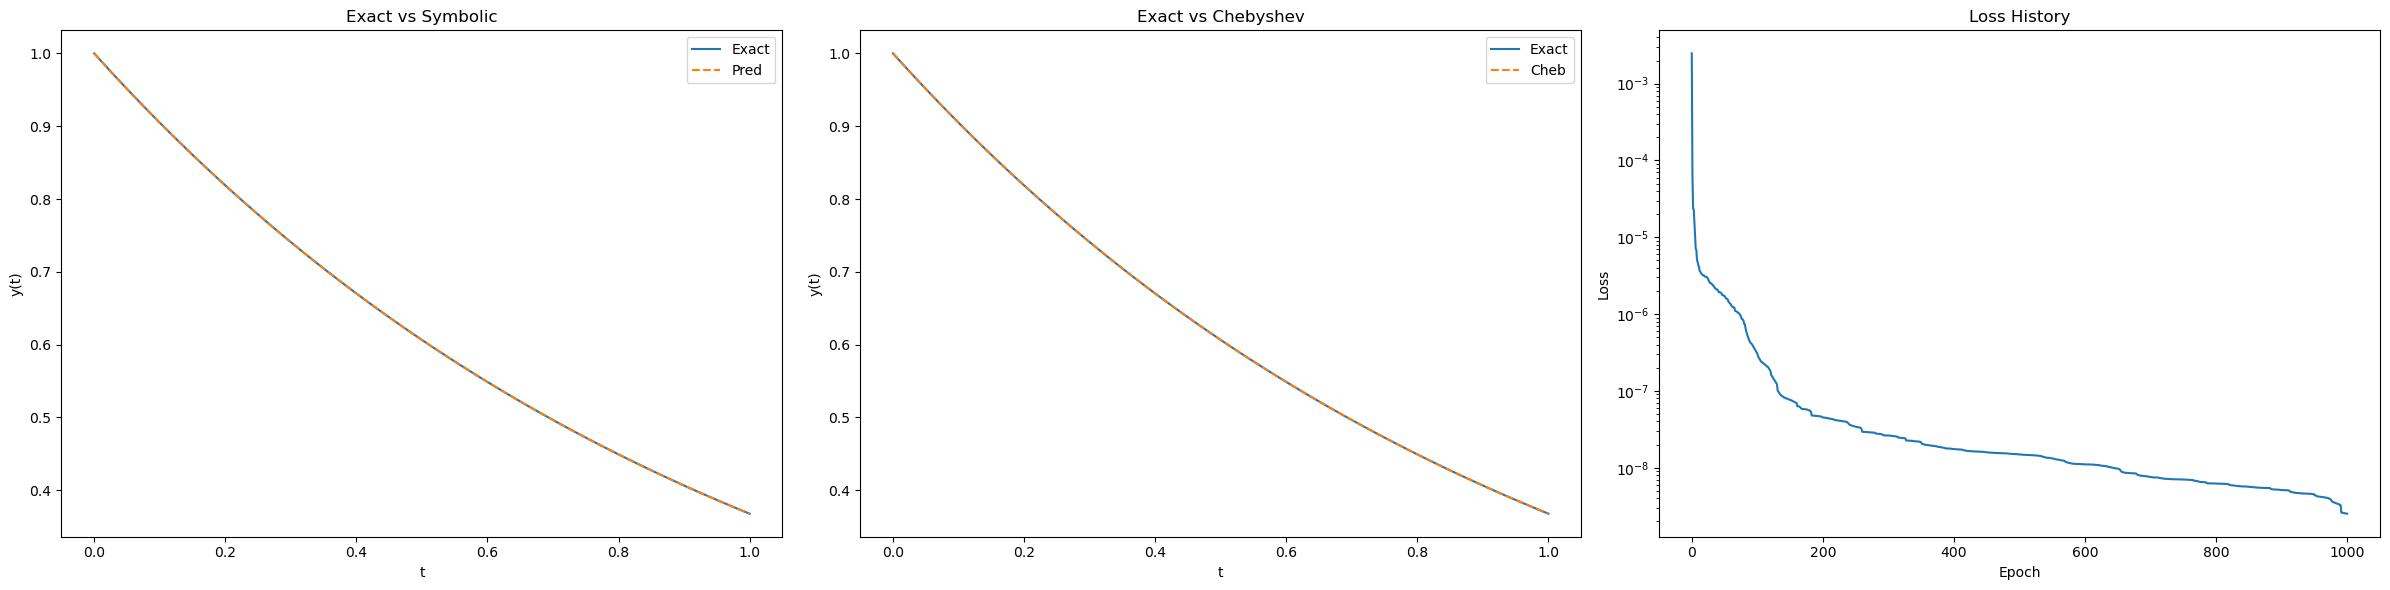

----------------------------------------------------------------------------------------------------------------------------------------------------------------------
|t	 |Exact				 |Symbolic			 |Sym Abs err			 |Chebyshev			|Cheb Abs err		 |Win|
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
|0.0	 |1.00000000000000000000 	 |1.00000000000651612098 	 |0.00000000000651612098	 |1.00000002150050049110 	|0.00000002150050049110	 |Yes|
|0.1	 |0.90392390229528241097 	 |0.90392390230456221012 	 |0.00000000000927979915	 |0.90483744978817270965 	|0.00091354749289029868	 |Yes|
|0.2	 |0.81707842114073125916 	 |0.81707842115181084086 	 |0.00000000001107958170	 |0.81873189135419710549 	|0.00165347021346584633	 |Yes|
|0.3	 |0.73857671491879806069 	 |0.73857671493086707315 	 |0.00000000001206901246	 |0.74081874065254904593 	|0.00224202573375098524	 |Yes|
|0.4	 |0.66761714629383028807 	

In [5]:
res = solve_examples(example_1_problem, idx="1", num_operator=["exp"])
plot_graphics(res, 1, cheb1)
print_table(cheb1, res, 1)

Symbolic Output
$$y(t) = e^{e^{1.6093036344361806 - e^{t+t^2}}} \left( - 2t +0.23467531157463395\right) \left(-2.1114195179554666 \cdot 10^{-12}\right) + e^{-t}$$